# **PFE: Solution of differential equations PDEs**

### **PART 1 : Solving partial differential equations using deep learning 'Neural networks' with SciANN library**

#### **The forth type of equations is linear elliptic equation**

   * **Importing libraries**

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import sciann as sn
from sciann.utils import sign

* **Generate the variables**

In [110]:
x = sn.Variable('x', dtype='float64')

* **Generate the outputs**

In [111]:
u = sn.Functional('u', [x], 8*[16], 'tanh')

* **Generate the loss function and boundary conditions** 

In [112]:
L = -sn.math.diff(u, x, order=2) + sn.exp(x)

In [ ]:
C1 = (1-sign(x + 1)*u) -1 
C2 = (1+sign(0 - x))*u + (np.exp(1)-2)
C3 = u*0.0

* **Generate the model**

In [113]:
model = sn.SciModel([x], [L, C1, C2, C3], optimizer='adam', loss_func='mse', plot_to_file='LE-MODEL.png')
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
D16b_13 (Dense)                 (None, 16)           32          x[0][0]                          
__________________________________________________________________________________________________
sci_activation_50 (SciActivatio (None, 16)           0           D16b_13[0][0]                    
__________________________________________________________________________________________________
D16b_14 (Dense)                 (None, 16)           272         sci_activation_50[0][0]          
___________________________________________________________________________________________

In [114]:
x_train = np.linspace(0, 1, 200)
x_test = np.linspace(0, 1, 11)
x_test

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [115]:
training_history = model.train([x_train], 4*['zeros'], learning_rate=0.0001, epochs=100)


Total samples: 200 
Batch size: 64 
Total batches: 4 

Epoch 1/100
4/4 [==============================] - 5s 83ms/step - batch: 1.5000 - size: 50.0000 - loss: 3.1272 - add_43_loss: 2.4634 - sub_19_loss: 0.1103 - add_46_loss: 0.5157 - mul_37_loss: 0.0000e+00 - lr: 1.0000e-04 - time: 4.7998
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - batch: 1.5000 - size: 50.0000 - loss: 3.2083 - add_43_loss: 2.6158 - sub_19_loss: 0.0981 - add_46_loss: 0.5157 - mul_37_loss: 0.0000e+00 - lr: 1.0000e-04 - time: 0.0249
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - batch: 1.5000 - size: 50.0000 - loss: 3.0593 - add_43_loss: 2.4763 - sub_19_loss: 0.0865 - add_46_loss: 0.5157 - mul_37_loss: 0.0000e+00 - lr: 1.0000e-04 - time: 0.0289
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - batch: 1.5000 - size: 50.0000 - loss: 3.1203 - add_43_loss: 2.5934 - sub_19_loss: 0.0718 - add_46_loss: 0.5158 - mul_37_loss: 0.0000e+00 - lr: 1.0000e-04 - time: 0.0923
Epoch 5

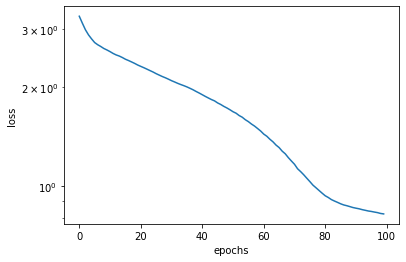

In [116]:
plt.semilogy(training_history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [117]:
# evaluate the test data
u_pred = u.eval(model, [x_test])
u_pred

array([ 0.60575136,  0.42669077,  0.26044016,  0.10797122, -0.03338576,
       -0.1632779 , -0.27809834, -0.37366913, -0.44773822, -0.50086836,
       -0.53580302])

In [118]:
# the weights and biases of model
print(np.array(u.get_weights()).shape)
# the number of parameters
print(u.count_params())

(17,)
1953


C:\Users\YOUSSE~1\AppData\Local\Temp/ipykernel_13436/1516686478.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array(u.get_weights()).shape)


Text(0, 0.5, '$u$')

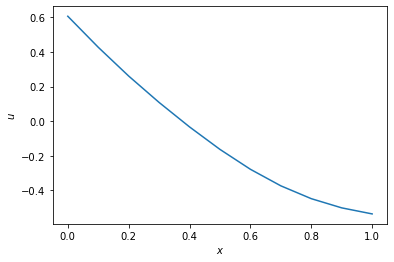

In [121]:
plt.plot(x_test, u_pred)
plt.xlabel('$x$')
plt.ylabel('$u$')